In [1]:
addpath('C:\Users\barry\Documents\Academics\Quantecon-Notes\functions')
addpath('C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\CEtools')
addpath('C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\CEtools\public')
cd 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions'

> In path (line 109)
  In addpath (line 86)



# Chapter 7: Discrete Time Discrete State Dynamic Models

In every period $t$, and agent observes the state of an economic process $s_t$, takes an action $x_t$, and earns reward $f(x_t,s_t)$. Action space: $X$

State space: $S$ follows a controlled Markov probability law: 

$$
Pr(s_{t+1} = s'|x_t = x, s_t = s) = P(s'|x,s)
$$

The agent seeks a policy $\{x_t^*\}_{t=1}^T$ where prescribes $x_t = x_t^*(s_t)$ be taken at each state in each time so to maximize utility:

$$
\max_{\{x_t^*\}_{t=1}^T} E[\sum_{t=0}^T \delta^t f(x_t, s_t)]
$$

Dynamic programming: decompose multiperiod model to a sequence of two period model. Principle of Optimality (Richard Bellman):

>An optimal policy has the property that, whatever the initial state and decision are, the remaining decisions must consistitute an optimal policy with regard to the state resulting from the first decision

Bellman equation:

$$
V_t(s) = \max_{x\in X(s)} [f(x,s) + \delta \sum_{s'\in S}P(s'|x,s)V_{t+1}(s')]
$$

If the decision problem has an infinite horizon, the value function will not depend on time $t$, and the Bellman equation will become the vector fixed point equation

$$
V(s) = \max_{x\in X(s)} [f(x,s) + \delta \sum_{s'\in S}P(s'|x,s)V(s')]
$$

## Solution Algorithm

States: $S = \{1,2,\cdots n\}$. Actions: $X = \{1,2,\cdots n\}$. Let $v\in R^n$ be an arbitrary value vector. $v_i \in R = \text{value in state }i$. Let $x\in X^n$ denote an arbitrary policy vector, and $x_i \in X = \text{action in state }i$

For each policy $x\in X^n$, let $f(x)$ denote the n-vector reward $f_i(x) = \text{reward when }x_i \text{ taken at state }i$. $P_{ij}(x) = \text{probability of jump from state }i\text{ to }j\text{, given }x_i\text{ is taken}$

In recursive vector equation,
$$
v_t = \max_{x} [f(x) + \delta P(x)v_{t+1}]
$$

### Algorithm: Backward Induction (finite horizon)

0. Initialization: Specify reward $f$, transition probability $P$, discount factor $\delta$, terminal period $T$, and end value $v_{T+1}$
1. Recursive step: given $v_{t+1}$, compute $v_t$ and $x_t$:
$$
\begin{aligned}
v_t &\leftarrow \max_{x}[f(x) + \delta P(x)v_{t+1}] \\
x_t &\leftarrow \arg\max_{x} [f(x) + \delta P(x) v_{t+1}]
\end{aligned}
$$

### Algorithm: Function Iteration (infinite horizon)

0. Specify $f, P, \delta$ and initial guess of $v=v_0$
1. Update value function 
$$v \leftarrow \max_x[f(x) + \delta P(x) v]$$
2. Terminates if $||\Delta v||$ is small and set $$x \leftarrow \arg\max_{x} [f(x) + \delta P(x) v]$$

### Algorithm: Policy Iteration (infinite horizon)

0. Specify $f, P, \delta$ and initial guess of $v=v_0$
1. Update policy function 
$$x \leftarrow \arg\max_x[f(x) + \delta P(x) v]$$
and updates value function
$$
v\leftarrow (I - \delta P(x))^{-1}f(x)
$$
2. Terminates if $||\Delta v||$ is small

## Examples

### Mine Management

Determine the optimal ore extraction schedule for a mine that will be shut down after $T$ years. Price: $p$ per ton. Cost of extracting $x$ tons: $c = x^2/(1+s)$, where $s$ is the amount remaining in the mine at the beginning of the year. Currently it has $\bar{s}$ in mine. Assuming the amount of ore must be an integer. 

Intratemporal reward: $f(s,x) = px - x^2/(1+s)$. So bellman equation

$$
V_t(s) = \max_{x = 0,1,\cdots} [px-x^2/(1+s) + \delta V_{t+1}(s-x)
$$
subject to $T_{T+1}(s) = 0$

In [101]:
 delta = 0.9; p = 1; sbar = 10; S = (0:sbar); %vector of states
 n = length(S); X = (0:sbar)'; %vector of actions
 m = length(X);
 
 f = zeros(n,m);
 for k = 1:m
     f(:,k) = p*X(k) - (X(k)^2)./(1+S);
     f(X(k)>S, k) = -inf;
end
g = zeros(n,m);
for k = 1:m
    j = max(0, S-X(k))+1;
    g(:,k) = j;
end


In [43]:
model.reward = f;
model.transfunc = g;
model.discount = delta;
model.horizon = 10;

In [44]:

[vi,xi, pstari] = ddpsolve(model);

Solve Bellman equation via backward recursion



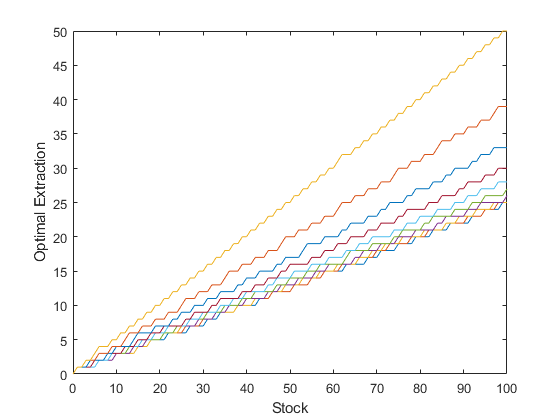

In [37]:
figure(1); plot(S, X(xi));
xlabel('Stock'); ylabel('Optimal Extraction');

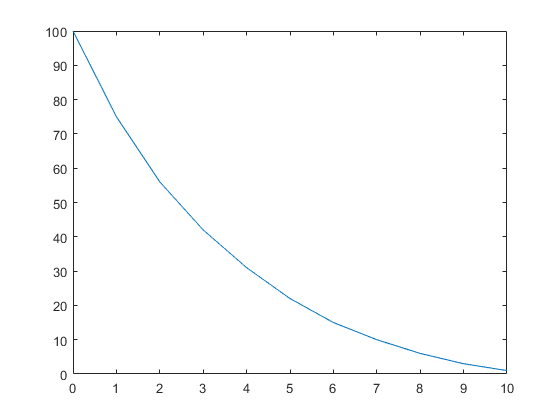

In [45]:
s1 = length(S); nyrs = 10;
sipath = ddpsimul(pstari, s1, nyrs, xi);
figure(2)
plot(0:nyrs, S(sipath))

### Asset Replacement

At the beginning of each year, a manufacturer must decide whether to continue operating with asset or replace it. Asset with $a$ years old gives $p(a)$ profit. It can be used up to $n$ years. The cost of new one is $c$. 

Infinite horizon deterministic model. State variable $a = \{1,2,\cdots n\}$. Action variable $x = [(keep, replace), replace]$ ([$a <n$, $a = n$]). The state transitoin function $g(a,x) = a+1$ if $x = keep$, and $1$ if $x = replace$. Reward function $f(a,x) = p(a)$ if $x = keep$, and $f(a,x) = p(0) - c$ if replace. 

Value function
$$
V(a) = \max_{x \in X(a)} [f(a,x) + \delta V(g(a,x))] = \max [p(a) + \delta V(a+1), p(0)-c + \delta V(1)]
$$

### Option Pricing

In Cox-Ross-Rubinstein binomial option pricing model, the price follows two-state discrete jump process. If stock is at price $p$ at time $t$, then in $t+1$ the price will be $pu$ with probability $q$ and $p/u$ with probability $1-q$, where $u = \exp{\sigma \sqrt{\Delta t}}, q = \frac{1}{2} + \frac{\sqrt{\Delta t}}{2\sigma}(r - \frac{1}{2}\sigma^2), \delta = \exp{-r\Delta t}$

If current price is $p_0$ and strike price is $\bar{p}$, expiration is $T$, the state space is $p \in S = \{p_0u^i|i = -N-1, -N, \cdots N, N+1\}$. The action space is $x = \{keep, exercise\}$, the transition probability is 
$$
P(p'|x,p) = \begin{cases}q \text{  if }p' = pu. \\
1-q \text{  if }p' = p/u.\\
0 
\end{cases}
$$

The reward function is 
$$
f(x,p) = \begin{cases}0 \text{  if keep}. \\
\bar{p} - p \text{  if exercise}.\\
0 
\end{cases}
$$

Value function
$$
V_t(p) = \max[\bar{p} - p, \delta (q V_{t+1}(pu) + (1-q) V_{t+1}(p/u))]
$$

In [191]:
clear all
T = 0.5; sigma = 0.2; r = 0.05; strike = 2; p0 = 2; N = 100;
tau = T/N; delta = exp(-r*tau); u = exp(sigma*sqrt(tau)); q = 0.5+tau^2*(r-(sigma^2)/2)/(2*sigma);
p = p0*(u.^(-N:N));
n = length(p);

%probability
%first column: reward for first option
f = [(strike - p)' zeros(n,1)];

%P is 2xnxn matrix. first nxn is transition matrix when first action is taken
P = zeros(n,n);
for i=1:n
 P(i, min(i+1,n),2) = q;
 P(i, max(i-1,1),2) = 1-q;
end
%P = sparse(P);
P = permute(P, [3,1,2]);

In [192]:
model.reward = f;
model.transprob = P;
model.discount = delta;
moel.horizon=N+1;

In [197]:
[v,x] = ddpsolve(model);

Solve Bellman equation via Newton method
    1    1.0e+01
    2    1.4e-02
    3    9.8e-03
    4    8.4e-03
    5    7.6e-03
    6    7.1e-03
    7    6.7e-03
    8    6.3e-03
> In ddpsolve (line 106)



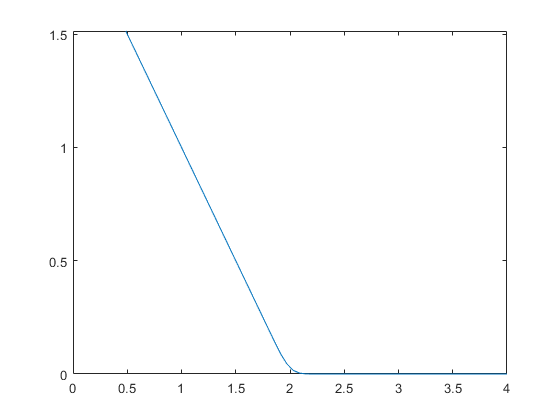

In [199]:
plot(p, v(:,1)); axis([0 strike*2 -inf inf])



# Chapter 8: Discrete Time Continuous State Dynamic Models

1. Centralized decision making (option pricing, industry entry, asset replacement)
2. Strategic gaming among a small number of participants (international trade, factory expansion, risk sharing)
3. Partial and general equilibrium model of collective, decentralized economic behavior. 

## Model structure:
In each period $t$, an agent observes the state of the economic process $s_t\in S$, takes an action $x_t \in X$, and earns a reward $f(s_t, x_t)$. The state of the economic process in period $t+1$ will depend on the state and action in period $t$ and an exogenous random shock $\epsilon_{t+1}$ that is unknown in period $t$: $s_{t+1} = g(s_t, x_t, \epsilon_{t+1})$. 

The agent seeks a policy of state-contingent actions $x_t^*:S\rightarrow X, t=0,1,\cdots T\leq \infty$, that maximizes $E_0\sum_{t=0}^T \delta^t f(s_t, x_t(s_t))$

Bellman equation:
$$
V_t(s) = \max_{x\in X(s)}[f(s,x) + \delta E_\epsilon V_{t+1}(g(s,x,\epsilon))]
$$

In infinite horizon, 
$$
V(s) = \max_{x\in X(s)}[f(s,x) + \delta E_\epsilon V(g(s,x,\epsilon))]
$$

## Continuous State Discrete Choice model (CSDC)

Optimal stopping problem

## Continuous State Continuous Choice Model (SCCC)

Markov decison models with continuous state and action spaces are special because their solutions can often be characterized by "first-order" equilibrium conditions. 

The equilibrium condition involve the derivative of the value function $\lambda(s) \equiv V'(s)$. We call $\lambda$ the shadow price function, which represents the marginal value of the state variable to the optimizer, or the price that the optimizer imputes to the state variable. 

The equilibrium condition is derived by applying KKT and Envelope Theorems to the optimization problem embedded in Bellman equation. 

Unconstrained KKT: 
$$
f_x(s,x) + \delta E_\epsilon [V'(g(s,x,\epsilon))g_x(s,x,\epsilon)] = f_x(s,x) + \delta E_\epsilon [\lambda(g(s,x,\epsilon))g_x(s,x,\epsilon)] = 0
$$
Envelope Theorem: 
$$
f_s(s,x) + \delta E_\epsilon [\lambda (g(s,x,\epsilon))g_s(s,x,\epsilon)] = \lambda(s)
$$

If the state transition only depends on the action of the agent, then $g_s = 0$, and we can substitute the expression derived using the Envelope theorem into the KKT and eliminate $\lambda$:

$$
f_x(s,x(s)) + \delta E_\epsilon [f_s(g(s,x(s),\epsilon),x(g(s,x(s),\epsilon)))g_x(s,x(s), \epsilon)] = 0
$$
which is called the Euler equation

## Linear-Quadratic Control

LQ control problem is an unconstrained Markov decision model with a quadratic reward function
$$
f(s,x) = F_0 + F_s s+F_x x + \frac{1}{2}s^T F_{ss} s + s^T F_{sx}x + \frac{1}{2}x^TF_{xx}x
$$
and a linear state transition function
$$
g(s,x,\epsilon) = G_0 + G_s s + G_x x + \epsilon
$$

It is a continuous state Markov decision model with a finite-dimensional solution. The optimal policy and shadow price functions for the infinite horizon linear-quadratic control moel are both linear in state variable:

$$
x(s) = \Gamma_0 + \Gamma_s s
$$
$$
\lambda(s) = \Lambda_0 + \Lambda_s s
$$

## Dynamic Games

Discrete time continuous state Markov $m$-agent game: in each period, each agent $i$ observes the stte of an economic process $s\in S$, takes an action $x_i \in X$, and earns a reward $f_i(s,x_i, x_{-i})$ that depends on what other people have done. The state of the economic process is a jointly controlled Markov process. 

Noncooperative Markov perfect equilibria (SPNE) with perfect information: $x_i^*: S\rightarrow X, i = 1,2, \cdots m$ such that $x_i^*$ maximizes 

$$
E_0\sum_{t=0}^T \delta^t f_i(s_t, x_i(s_t), x_{-i}^*(s_t))
$$

The Markov perfect equilibrium for m agents is characterized by a set of m simultaneous Bellman equations:

$$
V_i(s) = \max_{x\in X_i(s)} [f_i(s,x,x_{-i}^*(s))+ \delta E_\epsilon V_i(g(s,x,x_{-i}^*(s), \epsilon))]
$$

## Rational Expectation Model

Equilibrium through the decentralized actions of individuals. Assumption: agents are rational, that their expectations are consistent with the implications of the model as whole. 

At beginning of period $t$, an economic system emerges in a state $s_t$. Agents observe the state of the system and produce a systematic response $x_t$ governed by an equilibrium condition that depends on the expectations of the following period's state and action, i.e. satisfies $f(s_t, x_t, E_t h(s_{t+1}, x_{t+1})) = 0$ where $f$ is equilibrium condition. State transition: $s_{t+1}  g(s_t, x_t, \epsilon_{t+1})$. 

The response functoin $x(s)$ is characterized implicitly as the solution to a functional equaiton 
$$
f(s, x(s), E[h(g(s,x(s),\epsilon), x(g(s,x(s),\epsilon)))]) = 0
$$

## Examples 

**<span style="color:red">When using dpsolve, don't call for resid. Only four outputs: [c,s,v,x]</span>.**

**c: coefficient for basis functions. s: grid nodes. v: value functions. x: optimal action**

**If ckron(x) has error, use ckronx(x,1)**

**use cdprodx_new to replace cdprodx.mex**

## Continuous State Discrete Choice##
### Asset Replacement
In each period the producer must decide if to replace an asset. In the asset's $a^{th}$ period it generates $q(a)$ up to period $\bar{a}$. The price is $p$ and the cost $K$ for new asset is an exogenous continuous-valued Markov process $K_{t+1} = g(K_t, \epsilon_{t+1})$. State variable: $s = K\times a \in (0,\infty)\times [0,1, \cdots \bar{a}]$. Control variable: $keep$ or $replace$. 

Reward: $f(s,a,x) = \begin{cases} pq(0) - K \text{  if x = 1} \\ pq(a) \text{  if x = 0}\end{cases}$

Bellman equation:
$$
V(p,a) = \max[pq(a) + \delta EV(g(p,\epsilon), a+1), pq(0)-K + \delta EV(g(p,\epsilon),1)]
$$

Assume $q(a) = 100-5a-0.5a^2$, and $\bar{a} = 10$. Output price $p = 2$. Replacement cost $k_{t+1} = \bar{k} + \gamma(k_t - \bar{k}) + \epsilon_{t+1}$ where $\epsilon_t\sim N(0,\sigma^2)$.

In [4]:
%%file functions\asset_replace.m

function out = asset_replace(flag, s, x, e, price, kbar, gamma, abar);
k = s(:,1); a = s(:,2);
switch flag
case 'f';
 out = price*(50-2.5*a-0.25*a.^2).*(1-x) + (price*50 - k).*x;
 out(a==abar & x==0)=-inf;

case 'g';
 out(:,1) = kbar + gamma*(k - kbar) + e;
 out(:,2) = min(a+1, 10).*(1-x)+x;
end

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\asset_replace.m'.


In [23]:
addpath('C:\Users\barry\Documents\Academics\Quantecon-Notes\functions')
addpath('C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\CEtools')

delta = 0.9; price = 2; kbar = 100; gamma = 0.5; sigma = 15; abar = 6;

%% The function is not performing

%discreteize shock: five node gaussian quadrature scheme
m = 5;
[e,w] = qnwnorm(m,0, sigma^2);

%specify basis functions and collocation nodes:
n = 100;
kmin = 30;
kmax = 190;
fspace = fundefn('spli', n, kmin, kmax, [],[1:10]');
snodes = funnode(fspace);
s = gridmake(snodes);

%construct action space
x = [0;1];

%pack model structure:
model.func = 'asset_replace';
model.discount = delta;
model.e = e;
model.w = w;
model.actions = x;
model.discretestates = 2;
model.params = {price kbar gamma abar};

%initial guess for value
vinit = zeros(size(s,1),1);

%solve model
%[c,scoord,v,x,resid] = dpsolve(model, fspace, s);

### Timber Cutting

The owner must decide each year whether to cut down the stand and sell it for lumber. The biomass $s$ growths at deterministic rate $s_{t+1} = g(s_t)$. The profit contribution per unit of biomass is $p$. If cut timber, need to pay cost $C$. What is the optimal timber cutting policy?

Infinite horizon model with one continuous state variable $s \in [0, \infty)$. Choice variable $x = 1$ if cutt and $x = 0$ if not cut. Reward function 
$f(s,x) = \begin{cases}ps - C \text{  if x = 1} \\ 0 \text{  if x = 0}\end{cases}$
Bellman equation:
$$
V(s) = max[\delta EV(g(s)), ps - C + \delta EV(0)]
$$

Suppose $s_{t+1} = K + \exp{-\alpha} (s_t - K)$ if not cut $x = 0$

In [2]:
%%file functions\timber_cutting.m
function out = timber_cutting(flag, s, x, e, price, C, K, alpha)
switch flag
case 'f'
out = (price*s - C).*x;
case 'g';
out  =((K+exp(-alpha)*(s-K))).*(1-x);
end

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\timber_cutting.m'.


In [27]:
delta = 0.95; price = 1; C = 0.2; K = 0.5; alpha = 0.1;
n = 350; fspace = fundefn('lin',n, 0, K);
snodes = funnode(fspace);

x = [0;1];

model.func = 'timber_cutting';
model.discount = delta;
model.actions = x;
model.params = {price C K alpha};

In [28]:
[c,s,v,x,resid] = dpsolve(model,fspace,snodes);

   1    3.6e-01
   2    1.5e-01
   3    7.7e-03
   4    7.7e-03
   5    1.5e-04
   6    1.7e-16
Elapsed Time =    0.02 Seconds



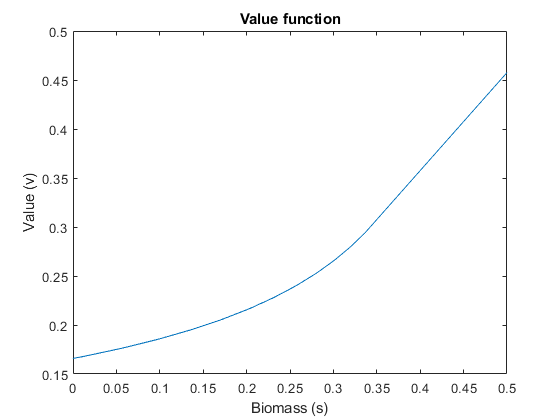

In [31]:
s = gridmake(snodes);
plot(s,v)
title('Value function')
xlabel('Biomass (s)')
ylabel('Value (v)')

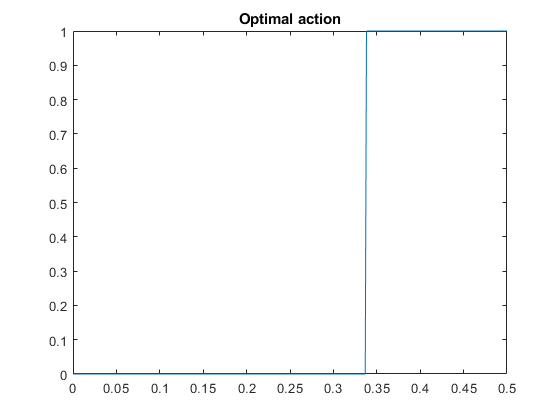

In [34]:
plot(s,x)
title('Optimal action')

### American Option Pricing

In the discrete-time Black-Scholes option pricing model, the price of the commodity follows an exogenous continuous valued Markov process $p_{t+1} = g(p_t, \epsilon_{t+1})$. What is the value of an American put at time $t$ if price is $p$, and strike price is $K$?

State space: $p \times i \in [0,\infty)\times \{0,1\}$, where $i = 1$ if the option is already executed. Action space $x = 1$ if execute and $x = 0$ if not execute. Reward function: $f(p,i,x) = ix(K-p)$. The value function $V_t(p,i)$ is 

$$
V_t(p,1) = \max[K-p, \delta EV(g(p,\epsilon),1)]
$$

In [67]:
%%file functions\american_option.m
function out = american_option(flag, s, x, e, K)
switch flag
case 'f';
out = (K-exp(s(:,1))).*x.*(1-s(:,2));
case 'g';
out = [s(:,1)+e s(:,2)|x]; % "|" is binary operator. Google it
end

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\american_option.m'.


In [116]:
clear all
sigma = 0.2;                                          % annual volatility
T     = 0.5;                                          % years to expiration
K     = 1.0;                                          % option strike price
p0    = 1.0;                                          % current asset price 
r     = 0.1;                                          % interest rate

nt = 30;
deltat = T/(nt-1);
beta = exp(-r*deltat);

m = 10;
[e,w] = qnwnorm(m,deltat*(r-sigma^2/2),deltat*sigma^2);

x = [0;1];
nx = length(x);

clear model;
model.func = 'american_option';
model.horizon = nt;
model.discount = beta;
model.e = e;
model.w = w;
model.actions = x;
model.discretestates = 2;
model.params = {K};

d = 6;
ns = 500;
s0 = log(p0);
smin = s0-d*sigma*sqrt(T);
smax = s0+d*sigma*sqrt(T);
fspace = fundefn('lin', ns, smin, smax,[],[0;1]);
scoord = funnode(fspace);
s = gridmake(scoord);

p = exp(s(:,1));
v = zeros(2*ns,1);

optset('dpsolve','nres',5);
[c,s,v,x] = dpsolve(model, fspace, s,v);

Solving for time 30
Solving for time 29
Solving for time 28
Solving for time 27
Solving for time 26
Solving for time 25
Solving for time 24
Solving for time 23
Solving for time 22
Solving for time 21
Solving for time 20
Solving for time 19
Solving for time 18
Solving for time 17
Solving for time 16
Solving for time 15
Solving for time 14
Solving for time 13
Solving for time 12
Solving for time 11
Solving for time 10
Solving for time 9
Solving for time 8
Solving for time 7
Solving for time 6
Solving for time 5
Solving for time 4
Solving for time 3
Solving for time 2
Solving for time 1



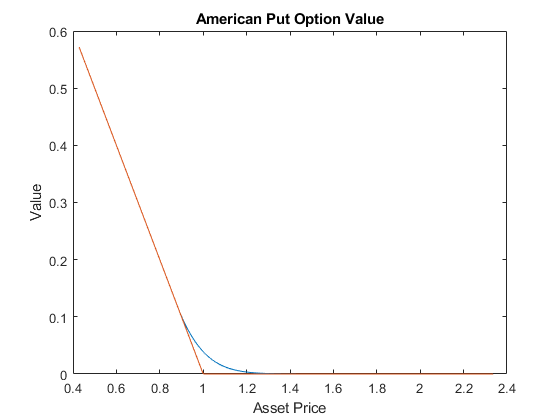

In [117]:
%figure(1);
p = exp(scoord{1});
v = reshape(v,ns,2,nt+1);
v = squeeze(v(:,1,:));
plot(p,v(:,1),p,max(K-p,0));
title('American Put Option Value');
xlabel('Asset Price'); ylabel('Value');

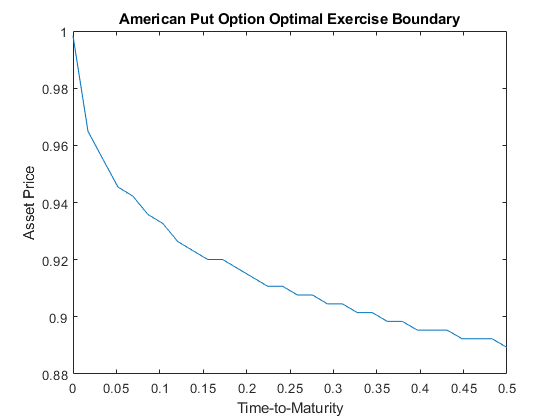

In [118]:
  figure(2);
  x = reshape(x,ns,2,nt);
  x = squeeze(x(:,1,:)); 
  plot(linspace(T,0,nt),p(sum(x==1)))
  title('American Put Option Optimal Exercise Boundary'); 
  xlabel('Time-to-Maturity'); ylabel('Asset Price');

### Industry Entry and Exit

A firm operates in an uncertain profit environment. At the beginning of each period, the firm observes the profit $s$ for this period, and the firm decides whether to operate and take the profit. The short-run profit $\pi$ is enxogenous continous Markov process $\pi_{t+1} = g(\pi_t, \epsilon_{t+1})$. If it closes after a period of active, it incurs a shut down cost $K_0$. If it starts after a period of inactive, in incurs a start tup cost $K_1$.

State variable: $\pi \times i \in R\times \{0,1\}$, where $i=0$ if it is inactive and $i=1$ if it is active. Action space: $x \in \{0,1\}$ where $x = 0$ if it shuts down. Profit function: $f(\pi,i,x) = ix\pi + (1-i)x(\pi-K_1) + i(1-x)(-K_0) = x\pi - K_0 i(1-x) - K_1x(1-i)$. Value function:

$$
V_t(\pi,i) = \max_{x = 0,1}[\pi x - K_0 i(1-x)-K_1x(1-i)+\delta EV(g(\pi,\epsilon),x)]
$$

Suppose the profit process is $\pi = \bar{\pi} + \gamma(\pi-\bar{\pi})+ \epsilon$, where $\epsilon \sim N(0,\sigma^2)$

In [137]:
%%file functions\industry_entry.m
function out = industry_entry(flag, s,x,e,pibar,gamma,k0,k1)
pi = s(:,1); i = s(:,2);
switch flag
case 'f'
out = pi.*x - k0.*i.*(1-x)-k1.*x.*(1-i);
case 'g'
out = [pibar+gamma*(pi-pibar)+e x];
end

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\industry_entry.m'.


In [22]:
pibar = 1;
gamma = 0.9;
k0 = 10;
k1 = 5;
delta = 0.98;
sigma = 0.9;

m = 10;
[e,w] = qnwnorm(m,0,sigma.^2);

x = [0;1];
nx = length(x);

clear model;
model.func = 'industry_entry';
model.actions = x;
model.e = e;
model.w = w;
model.discount = delta;
model.discretestates = 2;
model.params = {pibar gamma k0 k1};

n = 100;
pimin = pibar + min(e)/(1-gamma) - 0.1;
pimax = pibar + max(e)/(1-gamma) - 0.1;
fspace = fundefn('spli',n,pimin,pimax,[],[0;1]);
scoord = funnode(fspace);
s = gridmake(scoord);

[c,s,v,x] = dpsolve(model, fspace, s);

   1    4.2e+02
   2    5.7e+01
   3    2.0e+01
   4    1.7e+01
   5    9.8e-01
   6    5.1e-13
Elapsed Time =    0.01 Seconds



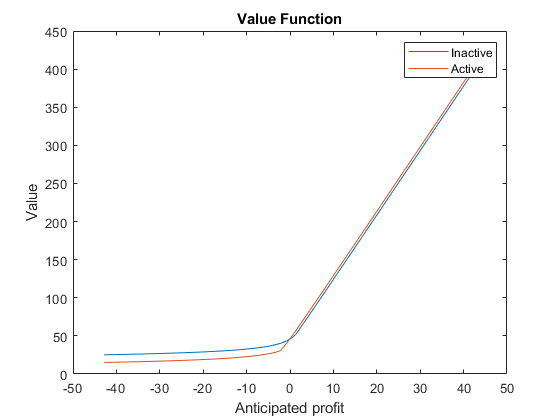

In [24]:
plot(scoord{1},v)
title('Value Function');
legend('Inactive','Active');
xlabel('Anticipated profit');
ylabel('Value');

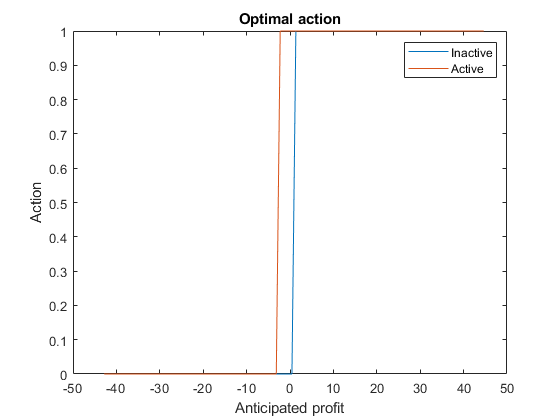

In [25]:
plot(scoord{1},x)
title('Optimal action');
legend('Inactive','Active');
xlabel('Anticipated profit');
ylabel('Action');

### Job Search

At the beginning of each period, the worker observes current wage $w$. If laborer is employed, he must decide to continue to work or not. if he is not employed, he must decide to accept the job or continue to search. If he works, he gets $w$. If search, he gets unemployment benefit $u$, and if neigher works nor searches, he gets leisure benefit $v$. If the agent searches the job, his probability of finding employment for the following period is $\pi_f$. If he works, he faces a probability $\pi_k$ of keeping his job for the following period. How low must the wage for him to decline search if unemployed, and how low must the wage to be for him to quit if employed?

State varible: $w\in [0,\infty)$ and $i=1$ if employed and $i=0$ if unemployed. Decision variable: $x = 1$ if employed continue or unemployed search, and $0$ otherwise. Reward function: $f(w,i,x) = wix + u(1-i)x+v(1-i)(1-x)+vi(1-x) = wix+u(1-i)x+v(1-x)$

Value function:
$$
V(w,i) = \max_{x = 0,1} [f(w,i,j)+\delta E[\pi_{ij} V(g(w,\epsilon),1)+(1-\pi_{ij})V(g(w,\epsilon),0)]]
$$
where $\pi_{01} = \pi_f, \pi_{11} = \pi_k, \pi_{00} = \pi_{10} = 0$

Suppose $w = \bar{w} + \gamma (w - \bar{w})+\epsilon$

In [26]:
%%file functions\job_search.m
function out = job_search(flag,s,x,e,pbar,gamma,u,v);
switch flag
case 'f'; % REWARD FUNCTION
  out = (x==0)*v + (x==1).*( (s(:,2)==0)*u + (s(:,2)==1).*s(:,1) );
case 'g'; % STATE TRANSITION FUNCTION
  out(:,1) = pbar+gamma*(s(:,1)-pbar)+e(:,1);
  out(:,2) = (x==1).*( (s(:,2)==0).*(e(:,2)==1) + (s(:,2)==1).*(e(:,3)==1) );
end


Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\job_search.m'.


In [30]:
clear all
  
  u =  90;                                              % unemployment benefit
  v =  95;                                              % benefit of pure leisure
  pbar = 100;                                           % long-run mean wage
  gamma = 0.50;                                         % mean reversion rate
  pfind = 0.90;                                         % probability of finding job
  pkeep = 0.90;                                         % probability of keeping job
  delta = 0.95;                                         % discount factor
  sigma = 2;                                            % standard deviation of error
   
% COMPUTE SHOCK DISTRIBUTION 
  m = 7;                                                % number of shocks
  [e1,w1] = qnwnorm(m,0,sigma.^2);                      % price shocks
  e2 = [0;1]; w2 = [1-pfind;pfind];                     % job finding shock
  e3 = [0;1]; w3 = [1-pkeep;pkeep];                     % job keeping shock
  e = gridmake(e1,e2,e3);                               % shock vector
  w = ckronx({w3,w2,w1},1);                                % shock probabilities

% CONSTRUCT ACTION SPACE
  x = [0;1];

% PACK MODEL STRUCTURE
  clear model  
  model.func = 'job_search';                                % model functions
  model.discount = delta;                               % discount factor
  model.e = e;                                          % shocks
  model.w = w;                                          % probabilities
  model.actions = x;                                    % model actions
  model.discretestates = 2;                             % index of discrete states    
  model.params = {pbar gamma u v};                      % other parameters

% DEFINE APPROXIMATION SPACE
  n = 150;                                              % number of price nodes
  pmin = 60;                                            % minimum price
  pmax = 140;                                           % maximum price
  fspace = fundefn('spli',n,pmin,pmax,[],[0;1]);        % approximation space
  scoord = funnode(fspace);                             % state collocation grid coordinates
  s = gridmake(scoord);                                 % state collocation grid points

% SOLVE BELLMAN EQUATION  
  [c,s,v,x] = dpsolve(model,fspace,s);

   1    2.0e+03
   2    1.0e+02
   3    3.3e+00
   4    2.5e-12
Elapsed Time =    0.03 Seconds



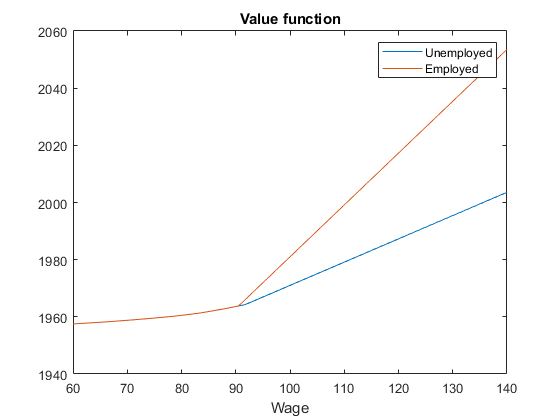

In [34]:
plot(s{1},v)
title('Value function')
legend('Unemployed','Employed')
xlabel('Wage')

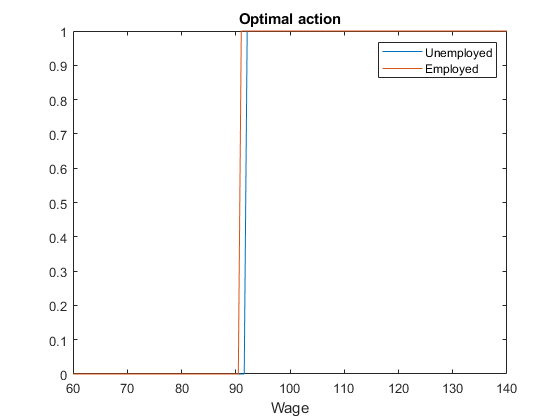

In [35]:
plot(s{1},x)
title('Optimal action')
legend('Unemployed','Employed')
xlabel('Wage')

## Continuous State Continuous Choice##

### Optimal Growth

Each year $t$ begins with a predetermined amount of the good $s_t$, of which an amount $x_t$ is invested and the remainder is consumed. The social welfare derived from consumption is $u(s_t - x_t)$. The amount of good available in year $t+1$ is $s_{t+1} = \gamma x_t + \epsilon_{t+1}f(x_t)$, where $\gamma = 1-\delta$ is capital survival rate, $f$ is the aggregate production function, and $\epsilon_{t+1}$ is a positive production shock with mean 1. what consumption-investment policy maximizes the sum of current and expected future welfare over an infinite horizon?

State variable: $s_t \in [0,\infty)$

Action variable: $x_t \in [0, s_t]$

State transition: $s_{t+1} = \gamma x_t + \epsilon_{t+1}f(x_t)$

Bellman equation:
$$
V(s) = \max_{0\leq x\leq s}[u(s-x) + \delta EV(\gamma x+ \epsilon f(x)]
$$

Assuming $u'(0) = -\infty$ and $f(0) = 0$, the constraints will never be binding at an optimum and the shadow price of the composite good $\lambda(s)$ will satisfy the Euler equation:

$$
u'(s-t) = \delta E[\lambda(\gamma x + \epsilon f(x))(\gamma + \epsilon f'(x))]
$$

$$
\lambda (s) = u'(s-x)
$$

(recall $\lambda$ is the derivative of V)

These conditions imply that along the optimal path, 

$$
u'_t = \delta E_t [(\gamma + \epsilon_{t+1}f'_t)u_{t+1}']
$$
where $u'_t$ is the current marginal utility and $\epsilon_{t+1}f'_t$ is the following period's marginal product of capittal. 

The certainty-equivalent steady-state, which is obtained by fixing the production shock $\epsilon$ at its mean $1$, are the stock level $s^*$, investment level $x^*$, and shadow price $\lambda^*$ that solve the nonlinear equation system 
$$
\begin{aligned}
u'(s^*-x^*) &= \delta \lambda^*(\gamma + f'(x^*)) \\
\lambda^* &= u'(s^* - x^*)\\
s^* &= \gamma x^* + f(x^*)
\end{aligned}
$$

Assume $u(c) = \frac{c^{1-\alpha}}{1-\alpha}, f(x) = x^\beta$, and iid lognormal shock $log(\epsilon) \sim N(0, \sigma^2$

In [9]:
%%file functions\optimal_growth.m
function [out1,out2,out3] = optimal_growth(flag,s,x,e,alpha,beta,gamma)
switch flag
case 'b'
out1 = zeros(size(s));
out2 = s;
case 'f'
out1 = ((s-x).^(1-alpha))/(1-alpha);
out2 = -(s-x).^(-alpha);
out3 = -alpha*(s-x).^(-alpha-1);
case 'g'
out1 = gamma*x + e.*x.^beta;
out2 = gamma+beta*e.*x.^(beta-1);
out3 = (beta-1)*beta*e.*x.^(beta-2);
end

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\optimal_growth.m'.


In [13]:
delta = 0.9;alpha = 0.2;beta = 0.5;gamma = 0.9;sigma = 0.1;
m = 3;
[e,w] = qnwlogn(m,0,sigma^2);

n = 10;
smin = 5;
smax = 10;
fspace = fundefn('cheb',n,smin,smax);
snodes = funnode(fspace);

model.func = 'optimal_growth';
model.discount = delta;
model.e = e;
model.w = w;
model.params = {alpha beta gamma};

estar = 1;
xstar = ((1-delta*gamma)/(delta*beta))^(1/(beta-1));
sstar = gamma*xstar + xstar^beta;

[vlq, xlq] = lqapprox(model, snodes, sstar, xstar, estar);

[c,s,v,x,resid] = dpsolve(model,fspace,snodes,vlq,xlq);

   1    6.8e-02
   2    1.8e-02
   3    9.3e-04
   4    2.9e-06
   5    3.0e-11
Elapsed Time =    0.12 Seconds



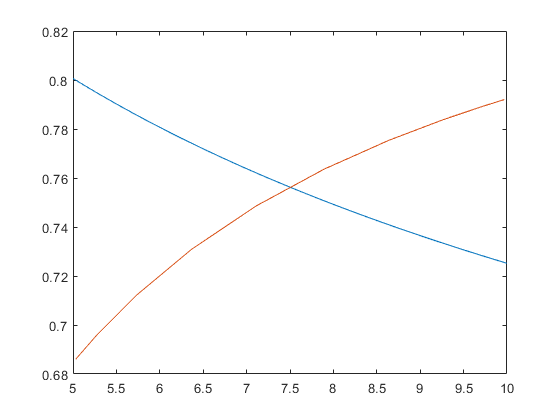

In [17]:
plot(s, x./s, snodes,xlq./snodes)

In [18]:
nyrs = 20;
nrep = 2000;
sinit = 5*ones(nrep,1);
[spath, xpath] = dpsimul(model, sinit, nyrs,s,x);

nsmooth = 5;
nbin = 80;
[ss,pi,xx] = dpstst(model, nsmooth, nbin, s,x);

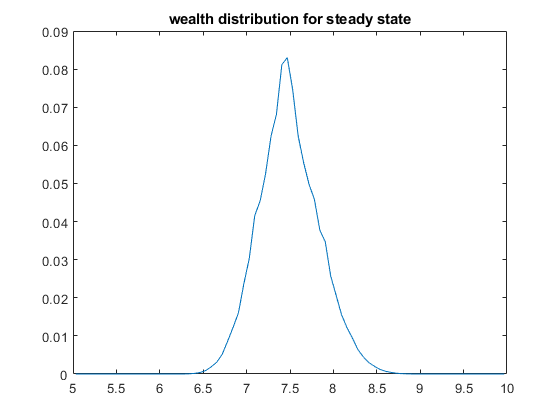

In [29]:
plot(ss,pi)
title("wealth distribution for steady state")

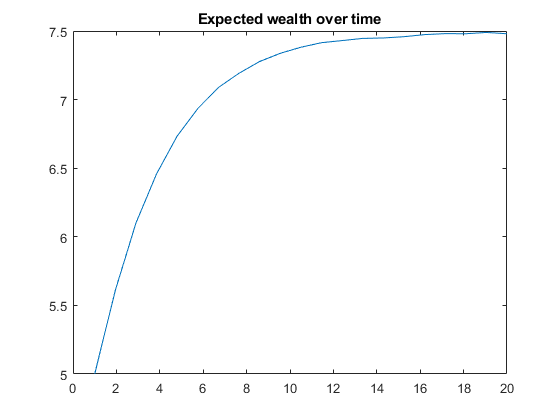

In [45]:
plot(linspace(1,nyrs,nyrs+1),mean(spath))
title("Expected wealth over time")

### Public Renewable Resource Management

Each year begins with a predetermined stock of the resource $s$, of which an amount $x$ is harvested at total cost $c(x)$ and sold at market clearing price $p(x)$. The stock of resource available at the beginning of each period follows a deterministic process $s_{t+1} = g(s_t - x_t)$. What is the harvest policy? What is the steady-state resource stock and how does it vary with interest rate?

State variable: $s\in[0,\infty)$. Choice variable: $x\in[0,s]$. Current reward: $f(x) = \int_0^x p(\xi)d\xi - c(x)$. Bellman equation:
$$
V(s) = \max_{0\leq x\leq s} [\int_0^x p(\xi)d\xi -c(x)+\delta V(g(s-x))]
$$

Assuming $p(0) = \infty$ and $g(0) = 0$, the constraint $x=0$ or $x=s$ will never bind and Euler equations:

$$
\begin{aligned}
p(x) &= c'(x)+\delta \lambda(g(s-x))g'(s-x)\\
\lambda(s) &= \delta \lambda(g(s-x))g'(s-x)\end{aligned}
$$
which implies
$$
\begin{aligned}
p(x) &= c'(x)+\delta \lambda_t\\
\lambda(s) &= \delta \lambda_{t+1}g'\end{aligned}
$$
For steady state, it solves 

$$
\begin{aligned}
p(x) &= c'(x)+\delta \lambda g'(s-x)\\
\lambda &= \delta \lambda g'(s-x)\\
s &= g(s-x)
\end{aligned}
$$

Suppose $p(x) = x^{-\gamma}$, $c(x) = kx$, and $g(s,x) = \alpha(s-x)-0.5\beta(s-x)^2$

In [36]:
%%file functions\public_resource.m
function [out1, out2, out3] = public_resource(flag, s,x,e,alpha, beta, gamma, k)
switch flag
case 'b'
out1 = zeros(size(s));
out2 = s;
case 'f'
out1 = (x.^(1-gamma))/(1-gamma)-k*x;
out2 = x.^(-gamma)-k;
out3 = -gamma*x.^(-gamma-1);
case 'g'
out1 = alpha*(s-x)-0.5*beta*(s-x).^2;
out2 = -alpha+beta*(s-x);
out3 = zeros(size(s)) - beta;
end

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\public_resource.m'.


In [108]:
clear all
delta = 0.9;
alpha = 4;
beta = 1;
gamma = 0.5;
k = 0.2;

n = 13;
smin = 6;
smax = 9;
fspace = fundefn('spli', n, smin, smax);
snodes = funnode(fspace);

model.func = 'public_resource';
model.discount = delta;
model.params = {alpha beta gamma k};

sstar = (alpha^2-1/delta^2)/(2*beta);
xstar = sstar - (delta*alpha-1)/(delta*beta);
pstar = xstar^(-gamma) - k;

[vlq,xlq] = lqapprox(model, snodes, sstar, xstar,pstar);

In [109]:
[c,s,v,x] = dpsolve(model, fspace, snodes, vlq,xlq);

  Running this M file version may be significantly slower and more memory intensive.
  Use MEXALL to create the executable (MEX or DLL) and make sure it is on the MATLAB path.
   1    4.5e-02
   2    4.1e-04
   3    7.8e-09
Elapsed Time =    0.34 Seconds



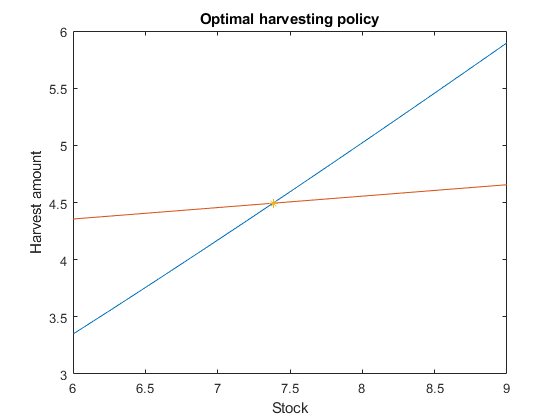

In [110]:
plot(s,x,s,xlq,sstar,xstar,'*')
title('Optimal harvesting policy');
xlabel('Stock')
ylabel('Harvest amount')

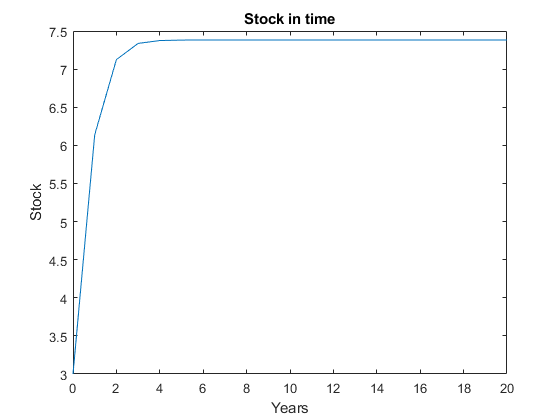

In [107]:
nyrs = 20;
sinit = 3;
[spath, xpath] = dpsimul(model, sinit, nyrs, s,x);
plot(linspace(0,nyrs, nyrs+1), spath)
title('Stock in time')
xlabel('Years')
ylabel('Stock')

### Private Nonrenewable Resource
Each period begins with a predetermined stock of ore $s$, of which $x$ is extracted at a total cost $c(s)$ and sold at market price $p$. What is the optimal extraction policy?

Infinite horizon. State variable: $s$. Choice variable: $x\in [0,s]$. Current profit: $f(s,x) = px - c(x)$. Value function: $$V(s) = \max_{0\leq x\leq s}[px - c(x)+\delta V(s-x)]$$

Since the constraints might be binding, the Euler conditions take the form of a complementarity condition. The shadow price of the resource $\lambda(s)$ is characterized by 

$$
p - c'(x) - \delta \lambda(s-x) = \mu
$$
$$
\lambda(s) = \delta \lambda(s-x) + \max(\mu,0)
$$
where $x$ and long run marginal profit of extraction $\mu$ must satisfy complementarity conditions $0\leq x\leq s, x>0\Rightarrow \mu >0, x<s \Rightarrow \mu \leq 0$
Ore is extracted until the long-run marginal profit is driven to 0 or $x=s$, which ever comes first. 

Suppose $p = a_1 -a_2 x/2, c(x) = b_1x-b_2x\frac{2s-x}{2}$, and state transition is $s_{t+1} = s_t - x_t$

In [111]:
%%file functions\nonrenewable_ore.m
function [out1, out2, out3] = nonrenewable_ore(flag, s,x,e,a,b)
switch flag
case 'b'
out1 = zeros(size(s));
out2 = s;
case 'f';
out1 = (a(1)-a(2).*x).*x/2 - b(1).*x+b(2).*x.*(2*s-x)/2;
out2 = a(1)-a(2).*x - b(1)+b(2)*s-b(2).*x;
out3 = (-a(2)-b(2))*ones(size(s));
case 'g';
out1 = s-x;
out2 = -ones(size(s));
out3 = zeros(size(s));
end

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\nonrenewable_ore.m'.


In [119]:
clear all
a = [10 0.8];
b = [12 1.0];
delta = 0.9;

model.func = 'nonrenewable_ore';
model.discount = delta;
model.params = {a b};

n = 100;
smin = 0;
smax = 10;
fspace = fundefn('spli',n,smin, smax);
snodes = funnode(fspace);

xinit = zeros(size(snodes));
vinit = zeros(size(snodes));

[c,s,v,x] = dpsolve(model, fspace, snodes, vinit, xinit);

  Running this M file version may be significantly slower and more memory intensive.
  Use MEXALL to create the executable (MEX or DLL) and make sure it is on the MATLAB path.
   1    1.6e+01
   2    2.7e+02
   3    3.5e+03
   4    3.3e+04
   5    2.8e+05
   6    1.9e+06
   7    1.7e+06
   8    1.3e+03
   9    1.3e+03
  10    1.3e+03
  11    1.3e+03
  12    1.3e+03
  13    1.3e+03
  14    1.3e+03
  15    1.3e+03
  16    1.3e+03
  17    1.3e+03
  18    1.2e+02
  19    2.8e-14
Elapsed Time =    1.24 Seconds



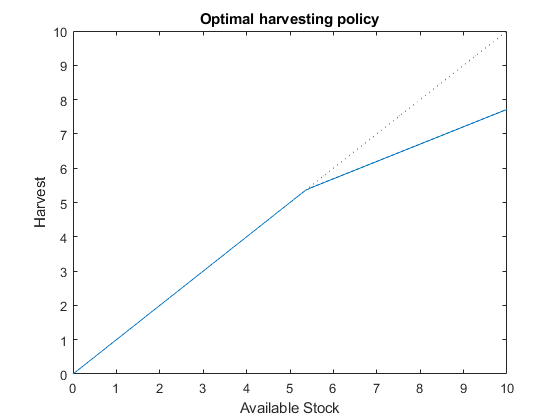

In [123]:
plot(s,x,s,s,':')
title('Optimal harvesting policy')
xlabel('Available Stock');
ylabel('Harvest')

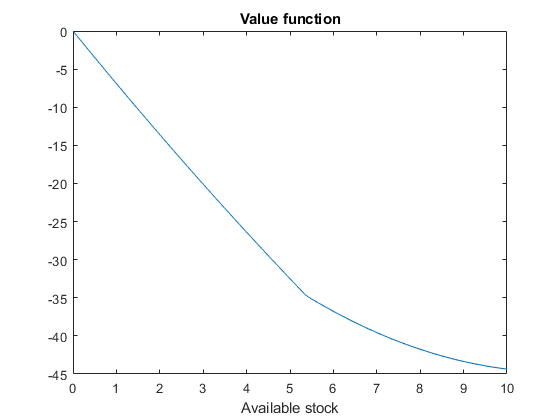

In [124]:
plot(s,v)
title('Value function')
xlabel('Available stock')

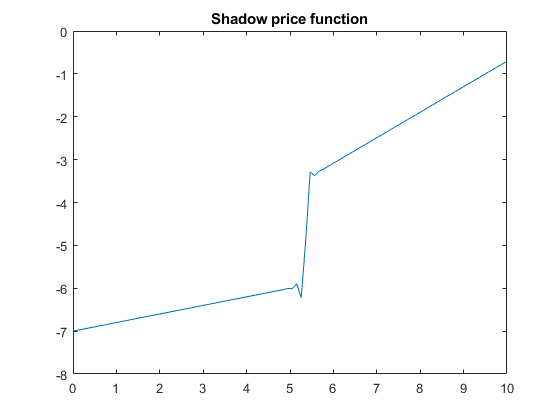

In [125]:
p = funeval(c,fspace, s,1);
plot(s,p);
title('Shadow price function')

### Optimal Monetary Policy

The central bank wishes to control nominal interest rate $x$ in order to minimize the volatility of the inflation rate $s_1$ and the output gap $s_2$. Specifically, it minimizes the expected discounted stream of weightes squared deviations from zero targets: $L(s) = \frac{1}{2}(s-s^*)^T\Omega (s-s^*)$, where s = [inflation; output gap] and $\Omega$ is 2x2 positive definite weight matrix. The inflation rate and the output gap are jointly controlled linear Markov process $s_{t+1} = \alpha+\beta s_t + \gamma x +\epsilon$. The nominal rate cannot be negative. What is the optimal monetary policy?

Infinite horizon. State variable: s = [inflation; output gap]. Choice variable: $x \in [0,\infty)$. Current reward: $f(s) = -L(s)$. Value function:

$$
V(s) = \max_{0\leq x}[-L(s) + \delta EV(g(s,x,\epsilon))]
$$



Suppose $\epsilon \sim N(0, \Sigma)$

In [3]:
%%file functions\monetary_policy.m
function [out1, out2, out3] = monetary_policy(flag, s, x, e, alpha, beta, gamma, omega,starget);
[n ds] = size(s);
switch flag
case 'b'
out1 = zeros(n,1);
out2 = inf*ones(n,1);
case 'f'
starget = starget(ones(n,1),:);
out1 = -0.5*((s-starget).^2)*omega';
out2 = zeros(n,1);
out3 = zeros(n,1);
case 'g'
out1 = alpha(ones(n,1),:)+s*beta'+x*gamma+e;
out2 = gamma(ones(n,1),:);
out3 = zeros(n,ds);
end

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\monetary_policy.m'.


In [44]:
clear all
alpha = [0.8 0.2];
beta = [0.8 0.2;0.13 0.5];
gamma = [-0.8 0];
omega = [0.3 1];
starget = [0 1];
sigma = 0.04*eye(2);
delta = 0.9;

m = [5 5];
mu = [0 0];
[e,w] = qnwnorm(m,mu,sigma);

model.func = 'monetary_policy';
model.discount = delta;
model.e = e;
model.w = w;
model.params = {alpha beta gamma omega starget};

n = [20 20];
nn = prod(n);
smin = [-15 -10];
smax = [15 10];
fspace = fundefn('spli',n, smin, smax);
scoord = funnode(fspace);
snodes = gridmake(scoord);

estar = mu;
sstar = starget;
xstar = (sstar(1)-alpha(1)-beta(1,:)*sstar')/gamma(1);
pstar = [0 0];

[vlq,xlq,plq,ss,xx,pp] = lqapprox(model,snodes,sstar,xstar,pstar);

optset('dpsolve','nres',4);
[c,s,v,x] = dpsolve(model, fspace, snodes,vlq, xlq);

  Running this M file version may be significantly slower and more memory intensive.
  Use MEXALL to create the executable (MEX or DLL) and make sure it is on the MATLAB path.
   1    8.2e+01
   2    5.5e-03
   3    1.4e-06
   4    3.7e-13
Elapsed Time =    1.08 Seconds



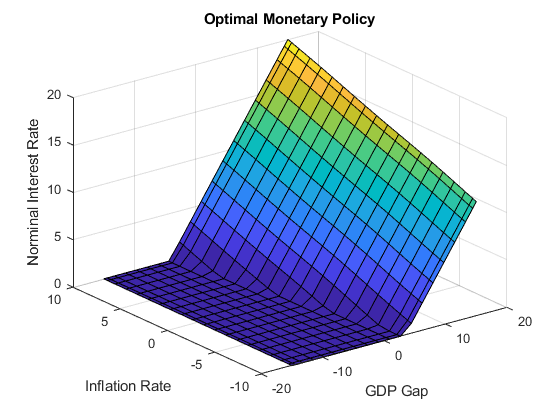

In [5]:
figure(1)
hh = surf(s{1},s{2},x');
title('Optimal Monetary Policy');
xlabel('GDP Gap');
ylabel('Inflation Rate');
zlabel('Norminal Interest Rate');

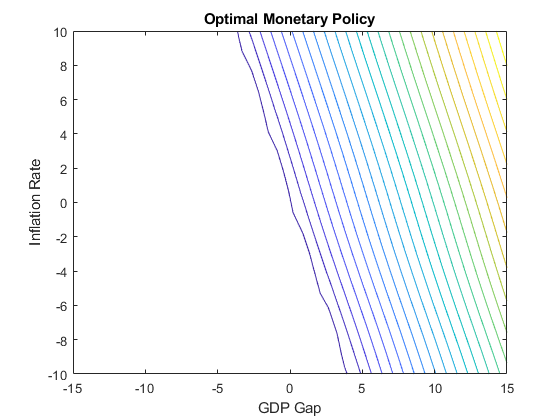

In [11]:
figure(2)
contour(s{1},s{2},x',25);
title('Optimal Monetary Policy');
xlabel('GDP Gap');
ylabel('Inflation Rate');
zlabel('Norminal Interest Rate');
rotate3d

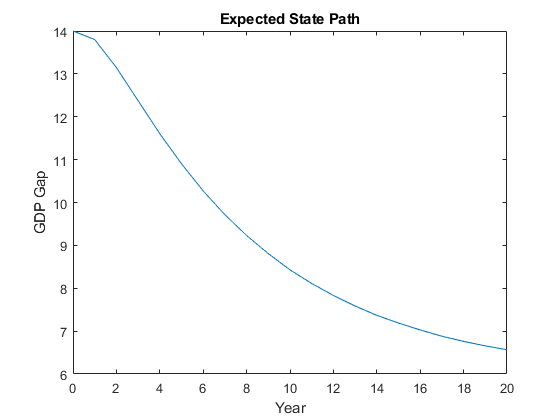

In [45]:
nyrs = 20;
nrep = 5000;
sinit = smax(ones(nrep,1),:)-1;
[spath,xpath] = dpsimul(model, sinit, nyrs, s,x);
s1path = squeeze(spath(:,1,:));
s2path = squeeze(spath(:,2,:));

figure(3);
plot(0:nyrs,mean(s1path));
title('Expected State Path');
xlabel('Year');
ylabel('GDP Gap');

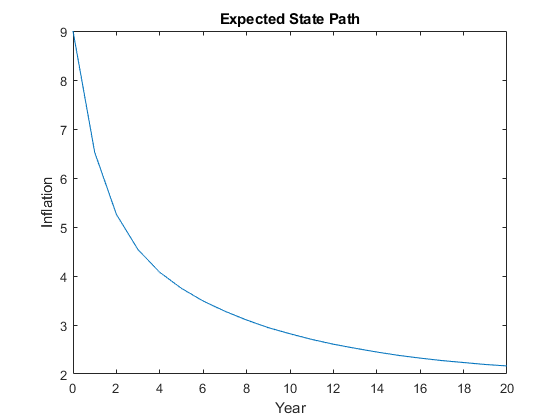

In [9]:
figure(4);
plot(0:nyrs,mean(s2path));
title('Expected State Path');
xlabel('Year');
ylabel('Inflation');

### Production Inventory model

A competitive price taking firm wishes to manage production and inventories so as to maximize long-term profit. Each period begins with a predetermined stock of inventory $s$ and decides how much to produce $q$ and how much to store $x$, buying or selling the resulting difference $s+q-x$ with price $p$. The firm's production and storage costs are given by $c(q)$ and $k(x)$, and market price follows $p_{t+1} = g(s_t, \epsilon_{t+1})$. 

State variable: $p$ and $s$. Choice variables: $q\geq 0$ and $x\geq 0$. Current profit: $f(p,s,q,x) = p(s+q-x)-c(q)-k(x)$. Bellman equation:
$$
V(p,s) = \max_{x,q}[p(s+q-x)-c(q)-k(x)+\delta EV(g(p,\epsilon),x)]
$$



If increasing marginal cost of production and $c'(0)$ is very small, then the production will be positive and the $q=0$ will never bind. Therefore, the Euler equation will satisfy 
$$
p = c'(q)
$$
$$
\delta E\lambda(g(p,\epsilon),x) - p - k'(x) = \mu
$$
$$
\lambda(p,s) = p
$$
$$x\geq 0, \mu \leq 0, x>0\Rightarrow \mu = 0$$

State transition: $s_{t+1} = x_t$, $p_{t+1} = \bar{p} + \rho(p-\bar{p})+\epsilon$, $c = c_1q+\frac{1}{2}c_2q^2$, $k = k_1x+\frac{1}{2}k_2x^2$

In [2]:
%%file functions\production_inventory.m
function [out1, out2, out3] = production_inventory(flag,s,x,e,c,k,pbar,rho)
n = size(s,1);
ds = 2;
dx = 2;
switch flag
case 'b'
out1 = zeros(size(s));
out2 = inf*ones(size(s));
case 'f'
out1 = zeros(n,1);
out2 = zeros(n,dx);
out3 = zeros(n,dx,dx);
out1 = s(:,2).*(s(:,1)+x(:,1)-x(:,2))...
        -(c(1)+0.5*c(2)*x(:,1)).*x(:,1)...
        - (k(1)+0.5*k(2)*x(:,2)).*x(:,2);
out2(:,1) = s(:,2) - (c(1)+c(2)*x(:,1));
out2(:,2) = -s(:,2) - (k(1)+k(2))*x(:,2);
out3(:,1,1) = -c(2)*ones(n,1);
out3(:,2,2) = -k(2)*ones(n,1);
case 'g'
out1 = zeros(n,ds);
out2 = zeros(n,ds,dx);
out3 = zeros(n,ds,dx,dx);
out1 = [x(:,2) pbar+rho*(s(:,2)-pbar)+e];
out2(:,1,2) = ones(n,1);
end

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\functions\production_inventory.m'.


In [6]:
clear all
c = [0.5 0.1];
k = [0.1 0.1];
pbar = 1.0;
rho = 0.5;
sigma = 0.2;
delta = 0.9;

m = 2;
[e,w] = qnwnorm(m,0,sigma^2);

model.func = 'production_inventory';
model.discount = delta;
model.e = e;
model.w = w;
model.params = {c k pbar rho};

estar = 0;
sstar = [0 pbar];
xstar = [(pbar-c(1))/c(2) 0];
pstar = [pbar xstar(1)/(1-delta*rho)];

n = [4 20];
smin = [0 pbar + min(e)/(1-rho)];
smax = [2 pbar + max(e)/(1-rho)];
fspace = fundefn('spli',n,smin,smax);
scoord = funnode(fspace);
snodes = gridmake(scoord);

dpcheck(model, sstar, xstar, estar);

[vlq, xlq, plq, ss,xx,pp] = lqapprox(model, snodes, sstar, xstar, pstar);



Possible Error in Derivatives
Discrepancies in derivatives = 
    0.1000    0.1000         0         0




In [7]:
[c,s,v,x] = dpsolve(model, fspace, snodes, vlq, xlq);

  Running this M file version may be significantly slower and more memory intensive.
  Use MEXALL to create the executable (MEX or DLL) and make sure it is on the MATLAB path.
   1    2.3e+00
   2    5.5e-14
Elapsed Time =    2.00 Seconds



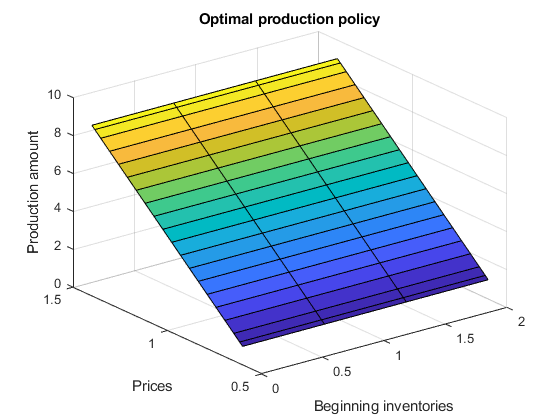

In [8]:
figure(1)
hh = surf(s{1},s{2},x(:,:,1)');
title('Optimal production policy')
xlabel('Beginning inventories');
ylabel('Prices');
zlabel('Production amount')

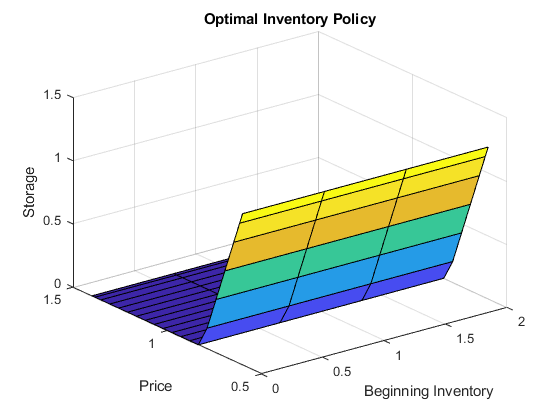

In [9]:
figure(2)
surf(s{1},s{2},x(:,:,2)');
title('Optimal Inventory Policy');
xlabel('Beginning Inventory');
ylabel('Price');
zlabel('Storage')

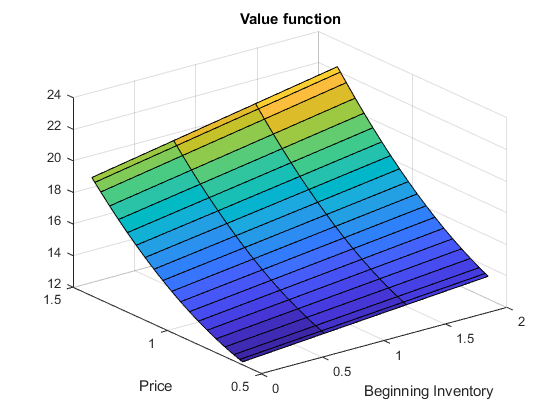

In [10]:
figure(3)
surf(s{1},s{2},v');
title('Value function');
xlabel('Beginning Inventory');
ylabel('Price');

In [20]:
nyrs = 20;
nrep = 1000;
sinit = smin(ones(nrep,1),:);
[spath,xpath] = dpsimul(model, sinit, nyrs, s,x);

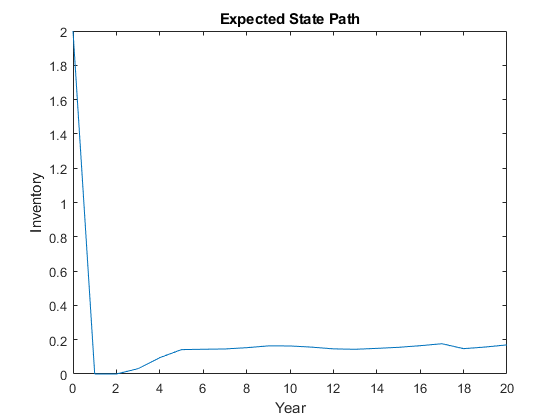

In [19]:
s1path = squeeze(spath(:,1,:));
s2path = squeeze(spath(:,2,:));
xpath = squeeze(xpath(:,1,:));

figure(4)
plot(0:nyrs, mean(s1path));
title('Expected State Path');
xlabel('Year');
ylabel('Inventory')

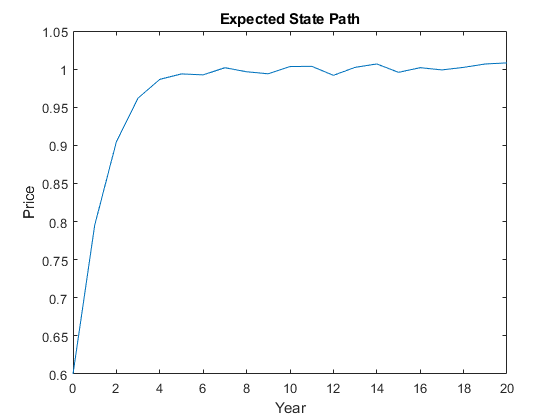

In [15]:
figure(5)
plot(0:nyrs, mean(s2path));
title('Expected State Path');
xlabel('Year');
ylabel('Price')

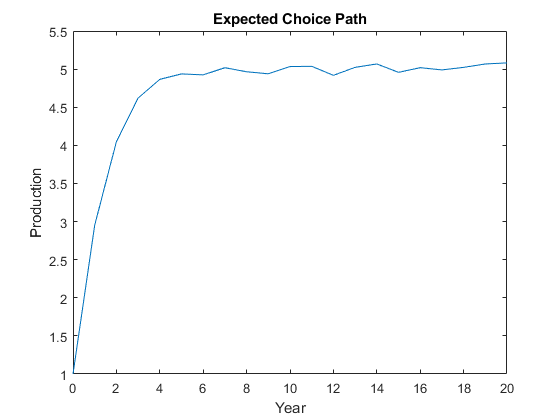

In [17]:
figure(6)
plot(0:nyrs, mean(xpath));
title('Expected Choice Path');
xlabel('Year');
ylabel('Production')